In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv("Twitter_Data.csv")

In [3]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
data.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [5]:
data.shape

(162980, 2)

In [6]:
data.columns

Index(['clean_text', 'category'], dtype='object')

In [7]:
data["category"].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

In [8]:
print("length of the data is: ",len(data))

length of the data is:  162980


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
clean_text    162976 non-null object
category      162973 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [10]:
data.dtypes

clean_text     object
category      float64
dtype: object

In [11]:
np.sum(data.isnull().any(axis=1))

11

In [15]:
data1 = data.dropna()

In [17]:
np.sum(data1.isnull().any(axis=1))

0

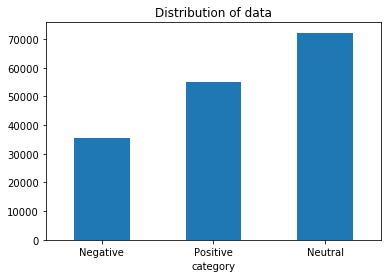

In [19]:
data2 = data1.groupby('category').count().plot(kind='bar', title='Distribution of data',legend=False)
data2.set_xticklabels(['Negative','Positive','Neutral'], rotation=0)
# Storing data in lists.
text, sentiment = list(data1['clean_text']), list(data1['category'])

In [25]:
df = data1[['clean_text','category']]

In [26]:
df['category'] = df['clean_text'].replace(4,1)

In [27]:
df['category'].unique()

array(['when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
       'talk all the nonsense and continue all the drama will vote for modi ',
       'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax',
       ..., 'did you cover her interaction forum where she left ',
       'there big project came into india modi dream project but not happened reality',
       'have you ever listen about like gurukul where discipline are maintained even narendra modi rss only maintaining the culture indian more attack politics but someone attack hinduism rss will take action that proud for '],
      dtype=object)

In [30]:
data_pos = data1[data1['category']==1]
data_neg = data1[data1['category']==-1]
data_neu = data1[data1['category']==0]

In [31]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
data_neu = data_neu.iloc[:int(20000)]

In [32]:
dataset = pd.concat([data_pos, data_neg, data_neu])

In [33]:
dataset['clean_text']=dataset['clean_text'].str.lower()
dataset['clean_text'].tail()

58378                             modi didn’ blame nehru  
58379    ahead the 2019 lok sabha election prime minist...
58382    reminds that bully school who would tell every...
58385    modi biggest shame india hopefully this joker ...
58390                                      modi soul india
Name: clean_text, dtype: object

In [34]:
dataset['clean_text'].head()

2    what did just say vote for modi  welcome bjp t...
3    asking his supporters prefix chowkidar their n...
4    answer who among these the most powerful world...
8    with upcoming election india saga going import...
9                           gandhi was gay does modi  
Name: clean_text, dtype: object

In [35]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [37]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(clean_text):
    return " ".join([word for word in str(clean_text).split() if word not in STOPWORDS])
dataset['clean_text'] = dataset['clean_text'].apply(lambda clean_text: cleaning_stopwords(clean_text))
dataset['clean_text'].head()

2    say vote modi welcome bjp told rahul main camp...
3    asking supporters prefix chowkidar names modi ...
4    answer among powerful world leader today trump...
8    upcoming election india saga going important p...
9                                      gandhi gay modi
Name: clean_text, dtype: object

In [38]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(clean_text):
    translator = str.maketrans('', '', punctuations_list)
    return clean_text.translate(translator)
dataset['clean_text']= dataset['clean_text'].apply(lambda x: cleaning_punctuations(x))
dataset['clean_text'].tail()

58378                               modi didn’ blame nehru
58379    ahead 2019 lok sabha election prime minister n...
58382    reminds bully school would tell everyone look ...
58385    modi biggest shame india hopefully joker shown...
58390                                      modi soul india
Name: clean_text, dtype: object

In [39]:
def cleaning_repeating_char(clean_text):
    return re.sub(r'(.)1+', r'1', clean_text)
dataset['clean_text'] = dataset['clean_text'].apply(lambda x: cleaning_repeating_char(x))
dataset['clean_text'].tail()

58378                               modi didn’ blame nehru
58379    ahead 219 lok sabha election prime minister na...
58382    reminds bully school would tell everyone look ...
58385    modi biggest shame india hopefully joker shown...
58390                                      modi soul india
Name: clean_text, dtype: object

In [40]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['clean_text'] = dataset['clean_text'].apply(lambda x: cleaning_URLs(x))
dataset['clean_text'].tail()

58378                               modi didn’ blame nehru
58379    ahead 219 lok sabha election prime minister na...
58382    reminds bully school would tell everyone look ...
58385    modi biggest shame india hopefully joker shown...
58390                                      modi soul india
Name: clean_text, dtype: object

In [41]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['clean_text'] = dataset['clean_text'].apply(lambda x: cleaning_numbers(x))
dataset['clean_text'].tail()

58378                               modi didn’ blame nehru
58379    ahead  lok sabha election prime minister naren...
58382    reminds bully school would tell everyone look ...
58385    modi biggest shame india hopefully joker shown...
58390                                      modi soul india
Name: clean_text, dtype: object

In [42]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['clean_text'] = dataset['clean_text'].apply(tokenizer.tokenize)
dataset['clean_text'].head()

2          [w]
3       [w, w]
4    [w, w, w]
8          [w]
9           []
Name: clean_text, dtype: object

In [43]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    clean_text = [st.stem(word) for word in data]
    return data
dataset['clean_text']= dataset['clean_text'].apply(lambda x: stemming_on_text(x))
dataset['clean_text'].head()

2          [w]
3       [w, w]
4    [w, w, w]
8          [w]
9           []
Name: clean_text, dtype: object

In [44]:
X=data.clean_text
y=data.category

In [49]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pillow in c:\users\dell\appdata\local\programs\python\python36\lib\site-packages (from wordcloud) (7.0.0)



In [55]:
import wordcloud
import matplotlib

In [56]:
pip install --upgrade wordcloud

Note: you may need to restart the kernel to use updated packages.


In [69]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace NaN values with empty strings
X_train.fillna('', inplace=True)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

# Fit the vectorizer on the data
vectorizer.fit(X_train)

print('No. of feature_words:', len(vectorizer.get_feature_names()))


No. of feature_words: 500000


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500000)

# Fit the vectorizer on the training data
vectorizer.fit(X_train)

# Transform the training and test data
X_train_transformed = vectorizer.transform(X_train)
X_test_transformed = vectorizer.transform(X_test)


In [97]:
pip install --upgrade wordcloud


In [101]:
# Convert all tweets to a single string
all_tweets = ' '.join(df['clean_text'])

# Generate WordCloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = set(STOPWORDS), min_font_size = 10).generate(all_tweets)

# Plot WordCloud                    
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


AttributeError: 'ImageDraw' object has no attribute 'textbbox'